In [3]:
import tensorflow as tf
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [3]:
# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03, 
                    random_state=42)

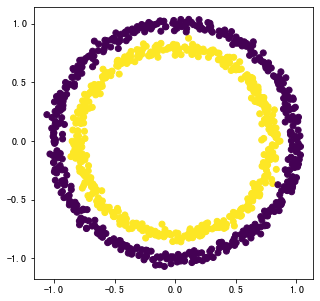

In [13]:
plt.figure(figsize=(5,5))
plt.scatter(X[:,0],X[:,1], c=y)

In [25]:
train_X, test_X, train_y, text_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
train_X.shape, train_y.shape

((800, 2), (800,))

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(40, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss=tf.keras.losses.binary_crossentropy,
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

history = model.fit(train_X, train_y, epochs=100, callbacks=[lr_scheduler])

In [63]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'lr'])

In [64]:
his_df = pd.DataFrame(history.history)
his_df.head()

,loss,accuracy,lr
0,0.699529,0.49500,0.000100
1,0.696907,0.49375,0.000112
2,0.694701,0.47875,0.000126
3,0.692913,0.49625,0.000141
4,0.691124,0.49750,0.000158


<AxesSubplot:>

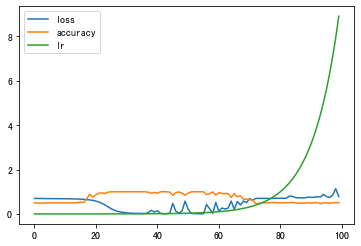

In [65]:
his_df.plot()

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

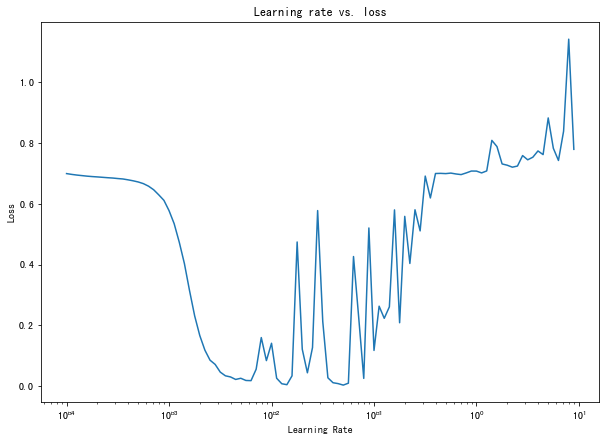

In [66]:
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [ ]:
# we can set lr at any point of low loss: 0.02, 0.04, 0.05, 0.07